In [2]:
# imports des modules utilisés pour le projet
import numpy as np
from random import *
import time
import matplotlib.pyplot as plt

# Partie 1 : Algorithme de Karger

Dans un premier temps, nous allons chercher à implémenter l'algorithme de Karger sur différentes structures de données représentant nos graphes. Nous allons ainsi pouvoir procéder à de premiers tests pour estimer le temps d'execution et la complexité de cet algorithme sur différentes tailles et différents modèles de graphes.

## 1.a : Structure de données et Contraction

Nous allons considérer des arrays en 2 dimensions pour représenter la matrice d'adjacence. Ainsi pour un graphe à $N$ noeuds, la matrice d'adjacence sera de taille $N*N$, où chaque valeur à la coordonnée $(x,y)$ représente le nombre d'arêtes entre les noeuds $x$ et $y$. Les graphes étant non orientés, cette matrice est donc symétrique.
Voici un exemple de définition suivant cette structure :
```
                 # x1 x2 x3 x4 x5 x6
                 
Graph = np.array([[0, 1, 0, 0, 0, 0],     # y1
                  [1, 0, 1, 0, 1, 0],     # y2
                  [0, 1, 0, 1, 1, 0],     # y3
                  [0, 0, 1, 0, 0, 1],     # y4
                  [0, 1, 1, 0, 0, 1],     # y5
                  [0, 0, 0, 1, 1, 0]])    # y6
```

Pour effectuer la contraction de deux sommets, nous allons considerer que l'on en isole un (par exemple $y$) et on ajoute tous les liens du noeud isolé au noeud restant (par exemple $x$).

In [3]:
def contraction(G, e):
    # récupération des indices des deux sommets à fusionner
    x,y = e
        
    # récupération du nombre d'arêtes entre y et chaque autre sommet
    fus_l = G[y,:]

    # on met à jour le sommet x en ajoutant les relations de y
    G[x,:] += fus_l
    G[:,x] += fus_l
    
    # on ne considère pas les arêtes auto-référentes
    G[x,x] = 0
    
    # on "isole" le sommet y en mettant ses lignes et colonnes correspondantes à 0
    G[y,:] = np.zeros(len(G))
    G[:,y] = np.zeros(len(G))
    
    # on renvoie le nouveau graphe
    return G

## 1.b : Tests et Temps d'éxecution

Nous allons effectuer de multiples tests sur différentes familles de graphes et différentes tailles pour estimer l'efficacité et la complexité de notre méthode de contraction. Pour chaque taille, nous allons tirer au hasard un couple de sommet à contracter et nous répèterons $1000$ fois le test pour avoir ainsi une moyenne du temps d'éxécution.

Un diagramme affiché à la suite des tests nous permettra de visualiser et d'analyser nos résultats.

### Graphes Complets

Rappel : Un graphe complet est un graphe dont chaque sommet est relié directement à tous les autres sommets.

In [4]:
tps_complet = []
N = [50,75,100,125,150,200,500,750,1000,1500,2000]

for n in N:
    tps_N = []
    # tirage aléatoire de 2 sommets à fusionner
    # toutes les instances de graph pour ce n fusionnerons les deux mêmes sommets
    e = (np.random.randint(n),np.random.randint(n))
    
    for i in range(1000):
        # création de la matrice d'un graph complet de taille n 
        # (chaque sommet est relié à tous les autres excepté lui-même)
        G = np.ones((n,n))
        G = G - np.eye(n)
        
        # calcul du temps d'execution
        debut = time.time()
        G = contraction(G,e)
        fin = time.time()
        
        # stockage des temps d'exécution pour ce n
        tps_N.append(fin-debut)
    
    # stockage de la moyenne des temps d'exécution pour chaque n
    tps_complet.append(np.mean(tps_N))

### Graphes à Cycles

Rappel : Un graphe $N$-cycles est constitué d'un unique cycle (suite d'arêtes consécutives d'extremités identique) de longueur $N$.

In [5]:
tps_cycle = []
N = [50,75,100,125,150,200,500,750,1000,1500,2000]

for n in N:
    tps_N = []
    # tirage aléatoire de 2 sommets à fusionner
    # toutes les instances de graph pour ce n fusionnerons les deux mêmes sommets
    e = (np.random.randint(n),np.random.randint(n))
    
    for i in range(1000):
        # création de la matrice d'un graph à cycle de taille n
        G = np.zeros((n,n))
        # chaque noeud est relié au noeud suivant et précédent
        # (autour de la diagonale)
        np.fill_diagonal(G[:,1:], 1)
        np.fill_diagonal(G[1:,:], 1)
        G[-1,0] = 1
        G[0,-1] = 1
        
        # calcul du temps d'execution
        debut = time.time()
        G = contraction(G,e)
        fin = time.time()
        
        # stockage des temps d'exécution pour ce n
        tps_N.append(fin-debut)
    
    # stockage de la moyenne des temps d'exécution pour chaque n
    tps_cycle.append(np.mean(tps_N))

### Graphes Aléatoires

Rappel : Une graphe aléatoire a ses arêtes tirées avec une probabilité $p \in [0,1]$.

In [6]:
tps_alea = []
N = [50,75,100,125,150,200,500,750,1000,1500,2000]

for n in N:
    tps_N = []
    # tirage aléatoire de 2 sommets à fusionner
    # toutes les instances de graph pour ce n fusionnerons les deux mêmes sommets
    e = (np.random.randint(n),np.random.randint(n))
    
    for i in range(1000):
        # création de la matrice du graph aléatoire
        G = np.random.randint(2, size = (n,n))
        # par soucis de symétrie, on ne garde qu'une partie triangulaire (ici supérieure hors diagonale)
        # que l'on copie sur l'autre moitié triangulaire
        G = np.triu(G, k=1) + np.transpose(np.triu(G, k=1))
        
        # Calcul du temps d'execution
        debut = time.time()
        G = contraction(G,e)
        fin = time.time()
        
        # stockage des temps d'exécution pour ce n
        tps_N.append(fin-debut)
    
    # stockage de la moyenne des temps d'exécution pour chaque n
    tps_alea.append(np.mean(tps_N))

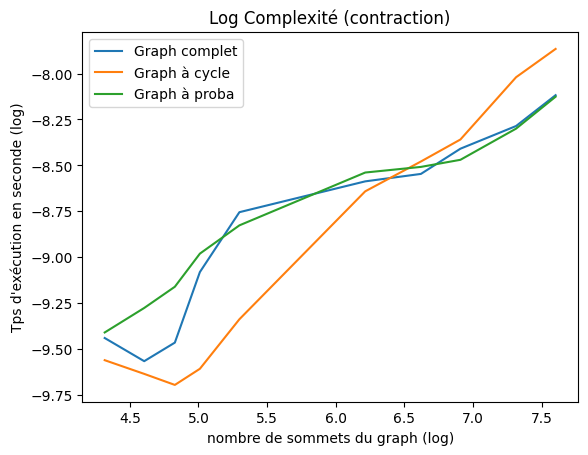

In [7]:
# Visualisation plus pratique
plt.figure()
plt.title('Log Complexité (contraction)')
plt.xlabel('nombre de sommets du graph (log)')
plt.ylabel('Tps d\'exécution en seconde (log)')
plt.plot(np.log(N[1:]), np.log(tps_complet[1:]), label='Graph complet')
plt.plot(np.log(N[1:]), np.log(tps_cycle[1:]), label='Graph à cycle')
plt.plot(np.log(N[1:]), np.log(tps_alea[1:]), label='Graph à proba')
plt.legend()
plt.show()

### Analyse

Par lecture des tracés, nous pouvons constater que les temps d'exécution semblent être du même ordre pour toutes les familles de graphes. Les courbes sont en effet groupées et suivent sensiblement la même pente. En les observant séparément, nous pouvons remarquer que la courbe des graphes cycles se démarquent légèrement. Pour les petites tailles de graphes, le cycle est légèrement plus rapide. Sur des tailles plus grandes en revanche, les temps d'exécutions se rapprochent et la tendance à l'air de s'inverser.

Nous pouvons également étudier leurs pentes globales en utilisant la formule :


$$
\frac{Log( tps[N] ) - Log( tps[1] )}{Log(N) - Log(1)}
$$

Nous effectuons les calculs dans la cellule suivante. Cela nous donne à peu près comme compléxité expérimentale $\mathcal{O}(n^{0,4})$ pour les graphes complets et aléatoires, et $\mathcal{O}(n^{0,5})$ pour les graphes $N$-cycles.

In [9]:
print( "Graphes Complet : " ,(np.log(tps_complet[-1]) - np.log(tps_complet[1])) / (np.log(N[-1]) - np.log(N[1])) )
print( "Graphes N-Cycles : " ,(np.log(tps_cycle[-1]) - np.log(tps_cycle[1])) / (np.log(N[-1]) - np.log(N[1])) )
print( "Graphes Aléatoire : " ,(np.log(tps_alea[-1]) - np.log(tps_alea[1])) / (np.log(N[-1]) - np.log(N[1])) )

Graphes Complet :  0.4033946460059988
Graphes N-Cycles :  0.517049840223208
Graphes Aléatoire :  0.3916135991882082


## 1.c : Tirage Aléatoire

Nous cherchons à tirer aléatoirement une arête parmi toutes celles existantes dans notre graphe. Une idée pour nous permettre de le faire serait de définir les probabilités de tirer un premier sommet en suivant le nombre d'arête relié à chacun, puis le deuxième parmi les sommets accessibles. Nous pourrions ainsi pondérer la probabilité de tirer un couple de sommet.

Nous allons pour cela sommer sur les lignes (ou les colonnes) les valeurs de la matrice d'adjacence. Nous avons ainsi un vecteur stockant le nombre d'arêtes partant de chaque sommet. Pour obtenir une probabilité, nous devons normaliser en divisant par la somme du nombre d'arêtes, divisée par deux (graph non orienté). Une fois le premier sommet tiré de cette manière, nous pondérons de la même manière sa ligne (ou sa colonne) correspondante  dans la matrice d'adjacence. Cela nous permet de tirer au hasard un deuxième sommet parmi les sommets directements accessibles.

Grâce à cette pondération, nous tirons forcément dès le premier coup une arête existante.

Le graphe étant non orienté et la matrice d'adjacence étant symétrique, l'axe sur lequel nous effectuons les opérations de pondération n'a pas de réelle importance.

In [10]:
def selectRandom(G):
    n = len(G)
    # calcul de la proba de choisir un arc relié à un certain sommet
    proba = ( np.sum(G, axis = 0)/(np.sum(G)) )
    
    # tirage aléatoire du premier sommet
    x = np.random.choice(n, p=proba)
    # tirage du second sommet parmi les possibilités depuis le premier sommet
    y = np.random.choice(n, p=G[x]/np.sum(G[x]))
                
    return x,y

## 1.d : Algorithme de Karger et Complexité (matrice)

En utilisant les méthodes programmées précédemment, nous pouvons ainsi coder l'argorihme de Karger utilisable sur des graphes représentés par matrice d'adjacence.

Nous pouvons donc également tester le temps d'éxecution et en déduire la complexité expérimentale de notre programme. Nous effectuerons des tests sur des graphes de différentes tailles et de différentes familles. Nous ferons pour chaque tailles la moyenne du temps d'execution sur $100$ tests.

In [12]:
def karger(G):
    # initialisation
    V = [*range(len(G))]
    v1 = set()
    v2 = set()

    # première itération pout initialiser v1
    # (on considère que les premiers sommets fusionner son stocké dans v1)
    x,y = selectRandom(G)
    G = contraction(G, (x,y))
    v1.update([x,y])
    V.remove(y)

    # boucle "tant que"
    while len(V) > 2:
        # selection de l'arête à contracter
        x,y = selectRandom(G)
        
        # contraction
        G = contraction(G, (x,y))
        
        # remplissage adéquat des sous-ensemble v1 et v2
        if (x in v1) or (y in v1):
            v1.update([x])
            v1.update([y])
        else:
            v2.update([x])
            v2.update([y])

        # on supprime le sommet de V
        V.remove(y)

    # placement des deux noeuds restants
    if V[0] in v1:
        v2.update([V[1]])
    else:
        v2.update([V[0]])
    
    # renvoie des deux sous-ensembles représentant la coupe
    return v1, v2

In [51]:
# test
G1 = np.array([[0,1,0,0,0,0],
               [1,0,1,0,1,0],
               [0,1,0,1,1,0],
               [0,0,1,0,0,1],
               [0,1,1,0,0,1],
               [0,0,0,1,1,0]])

print(karger(G1))

({1, 2, 3, 4, 5}, {0})


### Graphes Complets

In [21]:
tps_complet_karger = []
N = [10,20,30,50,75,100,125,150,250,500]

for n in N:
    tps_N = []
    
    for i in range(100):
        # création de la matrice d'un graph complet de taille n
        G = np.ones((n,n))
        G = G - np.eye(n)
        
        # Calcul du temps d'execution
        debut = time.time()
        S,V = karger(G)
        fin = time.time()
        
        # stockage des temps d'exécution pour ce n
        tps_N.append(fin-debut)
    
    # stockage de la moyenne des temps d'exécution pour chaque n
    tps_complet_karger.append(np.mean(tps_N))

### Graphes à Cycles

In [20]:
tps_cycle_karger = []
N = [10,20,30,50,75,100,125,150,250,500]

for n in N:
    tps_N = []
    
    for i in range(100):
        # création de la matrice d'un graph à cycle de taille n
        G = np.zeros((n,n))
        np.fill_diagonal(G[:,1:], 1)
        np.fill_diagonal(G[1:,:], 1)
        G[-1,0] = 1
        G[0,-1] = 1
        
        # Calcul du temps d'execution
        debut = time.time()
        S,V = karger(G)
        fin = time.time()
        
        # stockage des temps d'exécution pour ce n
        tps_N.append(fin-debut)
    
    # stockage de la moyenne des temps d'exécution pour chaque n
    tps_cycle_karger.append(np.mean(tps_N))

### Graphes Proba

In [22]:
tps_alea_karger = []
N = [10,20,30,50,75,100,125,150,250,500]

for n in N:
    tps_N = []
    
    for i in range(100):
        # création de la matrice du graph aléatoire
        G = np.random.randint(2, size = (n,n))
        G = np.triu(G, k=1) + np.transpose(np.triu(G, k=1))
        
        # Calcul du temps d'execution
        debut = time.time()
        S,V = karger(G)
        fin = time.time()
        
        # stockage des temps d'exécution pour ce n
        tps_N.append(fin-debut)
    
    # stockage de la moyenne des temps d'exécution pour chaque n
    tps_alea_karger.append(np.mean(tps_N))

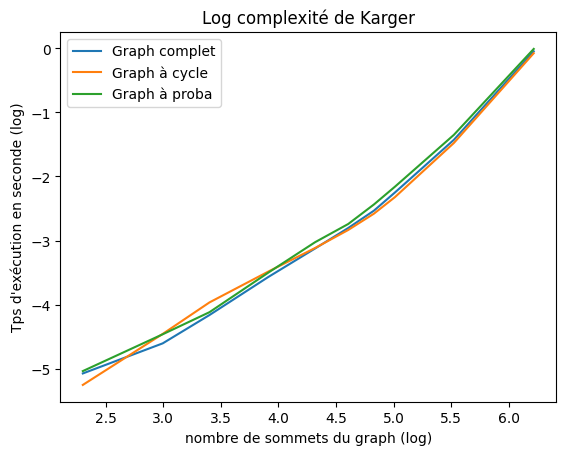

In [23]:
# Visualisation plus pratique
plt.figure()
plt.title('Log complexité de Karger')
plt.xlabel('nombre de sommets du graph (log)')
plt.ylabel('Tps d\'exécution en seconde (log)')
plt.plot(np.log(N), np.log(tps_complet_karger), label='Graph complet')
plt.plot(np.log(N), np.log(tps_cycle_karger), label='Graph à cycle')
plt.plot(np.log(N), np.log(tps_alea_karger), label='Graph à proba')
plt.legend()
plt.show()

In [24]:
print( "Graphes Complet : " ,(np.log(tps_complet_karger[-1]) - np.log(tps_complet_karger[0])) / (np.log(N[-1]) - np.log(N[0])) )
print( "Graphes N-Cycles : " ,(np.log(tps_cycle_karger[-1]) - np.log(tps_cycle_karger[0])) / (np.log(N[-1]) - np.log(N[0])) )
print( "Graphes Aléatoire : " ,(np.log(tps_alea_karger[-1]) - np.log(tps_alea_karger[0])) / (np.log(N[-1]) - np.log(N[0])) )

Graphes Complet :  1.2854115814140268
Graphes N-Cycles :  1.3235483958054919
Graphes Aléatoire :  1.2854494899897415


### Analyse

Nous voyons que les trois courbes sont extremement serrées. Le temps d'exécution semble donc peu dépendant de la famille de graphes passée en entrée.

Pour ce qui est de la complexité expérimentale, nous pouvons le calculer en suivant la même formule que précédemment. Nous trouvons alors une approximation en moyenne de $\mathcal{O}(n^{1,3})$, ce qui semble être meilleur que la compléxité théorique vue dans le cours de $\mathcal{O}(n^{2})$.

## 1.e : Nouvelle Structure de Données

Pour la seconde moitié de cette partie, nous allons utiliser une nouvelle structure de données pour coder nos matrices d'adjacence. Nous allons utiliser les dictionnaires, pour lesquels chaque clé correspondra à un sommet ou un groupe de sommet, et chaque entrée représentera une liste des sommets atteignables depuis ce groupe. Voici un exemple de définition d'une telle structure :

```
g = {'1': ['2', '3'],
     '2': ['1', '3', '5'],
     '3': ['1', '2', '4'],
     '4': ['3', '5'],
     '5': ['2', '4']}
```

In [26]:
def contraction2(g, arete):
    i, j = arete  #les deux sommets de l'arête 
    noeud = i + "," + j #le nouveau sommet
    g[noeud] = [] #la liste des successeur du sommet

    #O(n)
    for elm in g[i]:
        if elm not in i.split(',') and elm not in j.split(','):
            g[noeud].append(elm)
            
    #O(n)
    for elm in g[j]:
        if elm not in i.split(',') and elm not in j.split(','):
            g[noeud].append(elm)
    
    del g[i] 
    del g[j]
    return g

## 1.f : Tirage aléatoire sur la nouvelle structure

Chaque sommet existe dans le dictionnaire exactement le nombre de fois où il est relié par une arête. On construit une liste qui est la concaténation de toutes les listes du dictionaire on note LISTE

1 - on tire un sommet aléatoir dans la liste LIST on note S

2 - on tire un autre sommet aléatoir de la liste du sommet S 

In [27]:
def randomSommet(g):
    liste = []

    #O(n)
    for elm in g.keys():
        liste += list(g[elm])
    
    i = randint(0, len(liste)-1)
    s1 = liste[i]
    s2 = -1

    if s1 in g:
        i = randint(0, len(g[s1])-1)
        s2 = g[s1][i]
    else:
        l = list(g.keys())

        #O(n)
        for elm in l:
            e = elm.split(',')

            if s1 in e:
                i = randint(0, len(g[elm]) - 1)
                s1 = elm
                s2 = g[elm][i]
                break
    
    l = list(g.keys())

    if s2 not in g:
        #O(n)
        for elm in l:
            e = elm.split(',')
            if s2 in e:
                s2 = elm
                break
    
    return (s1, s2)

## 1.g : Complexité Théorique

La fonction de contraction s'éxecute en $\mathcal{O}(2n)$,

La fonction qui probabiliste qui tire au hasard une arête s'éxecute en $\mathcal{O}(3n)$

La boucle tant-que est de complexité $\mathcal{O}(n)$

La complexité totale est donc de $\mathcal{O}(n(2n + 3n)) = \mathcal{O}(5n^{2})$

In [28]:
def karger2(g):
    while len(g.keys()) > 2:
        arete = randomSommet(g)
        g = contraction2(g, arete) 
    return g

# Analyse

In [38]:
# test
g = {'1': ['2', '3'],
     '2': ['1', '3', '5'],
     '3': ['1', '2', '4'],
     '4': ['3', '5'],
     '5': ['2', '4']}

karger2(g)

{'1,2,3': ['5', '4'], '4,5': ['3', '2']}

## 1.h : Algorithme de Karger et Complexité (dictionnaire)

### Graphes Complets

In [29]:
def grapheComplet(taille):
    g = dict()
    #la liste de tous les sommets 
    liste = []
    i = 1
    while i <= taille:
        liste.append(str(i))
        i += 1
    
    i = 1
    while i <= taille:
        liste1 = liste.copy()
        liste1.remove(str(i))
        g[str(i)] = liste1 
        i += 1
    return g

tps_complet_karger2 = []
N = [10,20,30,50,75,100,125,150]

for n in N:
    tps_N = []
    
    for i in range(100):
        # création de la matrice d'un graph complet de taille n
        G = grapheComplet(n)
        
        # Calcul du temps d'execution
        debut = time.time()
        g = karger2(G)
        fin = time.time()
        
        # stockage des temps d'exécution pour ce n
        tps_N.append(fin-debut)
    
    # stockage de la moyenne des temps d'exécution pour chaque n
    tps_complet_karger2.append(np.mean(tps_N))


### Graphes à Cycles

In [30]:
def grapheCycle(taille):
    g = dict()
    i = 1 
    while i < taille:
        g[str(i)] = [str(i+1)]
        i += 1
    g[str(taille)] = [str(1)]
    i = taille
    while i > 1:
        g[str(i)].append(str(i-1))
        i -= 1
    g['1'].append(str(taille))
    return g

tps_cycle_karger2 = []
N = [10,20,30,50,75,100,125,150]

for n in N:
    tps_N = []
    
    for i in range(100):
        # création de la matrice d'un graph complet de taille n
        G = grapheCycle(n)
        
        # Calcul du temps d'execution
        debut = time.time()
        g = karger2(G)
        fin = time.time()
        
        # stockage des temps d'exécution pour ce n
        tps_N.append(fin-debut)
    
    # stockage de la moyenne des temps d'exécution pour chaque n
    tps_cycle_karger2.append(np.mean(tps_N))

### Graphes Bipartie Complets

In [31]:
def grapheBipartieComplet(taille): #taille doit être multiple de 2 sinon on prend taille+1 ; E1 = {sommet1, ..., sommetTaille/2}
                            #et E1 = {sommet_Taille/2+1, ..., sommetTaille}
    g = dict()
    
    if(taille %2 != 0):
        taille += 1
    listeSommetE1 = []
    i = 1
    while i <= taille/2:
        listeSommetE1.append(str(i))
        i += 1
    listeSommetE2 = []
    while i <= taille:
        listeSommetE2.append(str(i))
        i += 1
    
    i = 1
    while i <= taille/2:
        g[str(i)] = listeSommetE2
        i += 1
    while i <= taille:
        g[str(i)] = listeSommetE1
        i += 1
    return g

tps_biparti_karger2 = []
N = [10,20,30,50,75,100,125,150]

for n in N:
    tps_N = []
    
    for i in range(100):
        # création de la matrice d'un graph complet de taille n
        G = grapheBipartieComplet(n)
        
        # Calcul du temps d'execution
        debut = time.time()
        g = karger2(G)
        fin = time.time()
        
        # stockage des temps d'exécution pour ce n
        tps_N.append(fin-debut)
    
    # stockage de la moyenne des temps d'exécution pour chaque n
    tps_biparti_karger2.append(np.mean(tps_N))

### Graphes Aléatoires

In [32]:
def grapheAleatoire(taille):
    g = dict()
    i = 1
    while i < taille:
        if str(i) not in list(g.keys()):
            g[str(i)] = []
        j = i + 1
        while j <= taille:
            if randint(0,1) == 1:
                g[str(i)].append(str(j))
                if str(j) not in list(g.keys()):
                    g[str(j)] = []
                g[str(j)].append(str(i))
                    
                
            j += 1
        i += 1
        
    return g

tps_alea_karger2 = []
N = [10,20,30,50,75,100,125,150]

for n in N:
    tps_N = []
    
    for i in range(100):
        # création de la matrice d'un graph complet de taille n
        G = grapheAleatoire(n)
        
        # Calcul du temps d'execution
        debut = time.time()
        g = karger2(G)
        fin = time.time()
        
        # stockage des temps d'exécution pour ce n
        tps_N.append(fin-debut)
    
    # stockage de la moyenne des temps d'exécution pour chaque n
    tps_alea_karger2.append(np.mean(tps_N))

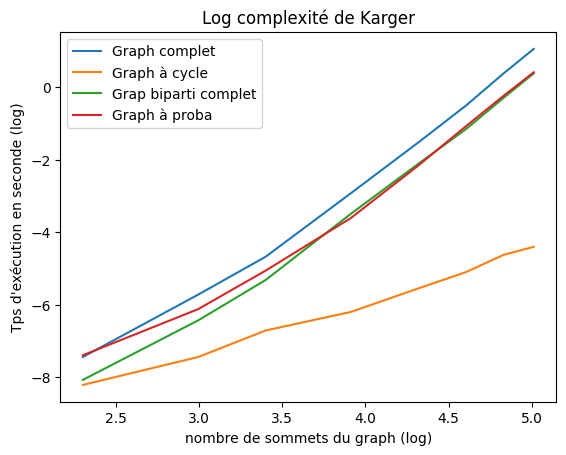

In [33]:
# Visualisation plus pratique
plt.figure()
plt.title('Log complexité de Karger')
plt.xlabel('nombre de sommets du graph (log)')
plt.ylabel('Tps d\'exécution en seconde (log)')
plt.plot(np.log(N), np.log(tps_complet_karger2), label='Graph complet')
plt.plot(np.log(N), np.log(tps_cycle_karger2), label='Graph à cycle')
plt.plot(np.log(N), np.log(tps_biparti_karger2), label='Grap biparti complet')
plt.plot(np.log(N), np.log(tps_alea_karger2), label='Graph à proba')
plt.legend()
plt.show()

In [53]:
print( "Graphes Complet : " ,(np.log(tps_complet_karger2[-1]) - np.log(tps_complet_karger2[0])) / (np.log(N[-1]) - np.log(N[0])) )
print( "Graphes N-Cycles : " ,(np.log(tps_cycle_karger2[-1]) - np.log(tps_cycle_karger2[0])) / (np.log(N[-1]) - np.log(N[0])) )
print( "Graphes Bi-Parti Complets : " ,(np.log(tps_biparti_karger2[-1]) - np.log(tps_biparti_karger2[0])) / (np.log(N[-1]) - np.log(N[0])) )
print( "Graphes Aléatoire : " ,(np.log(tps_alea_karger2[-1]) - np.log(tps_alea_karger2[0])) / (np.log(N[-1]) - np.log(N[0])) )

Graphes Complet :  3.1345999914905183
Graphes N-Cycles :  1.4054584018485934
Graphes Bi-Parti Complets :  3.1182436580792743
Graphes Aléatoire :  2.8797110028999047


### Analyse

Nous pouvons constater sur le diagramme que l'éxecution de l'algorithme sur les gaphes à $N$-cycles est plus rapide que sur les autres familles de graphes.

Cela se voit également en regardant les complexités expérimentales calculées ci-dessus. La complexité pour les cycles est de $\mathcal{O}(n^{1,4})$, tandis que les autres semblent tourner autour de $\mathcal{O}(n^3)$. Cette complexité globale est moins bonne qu'en utilisant des matrices d'adjacence.

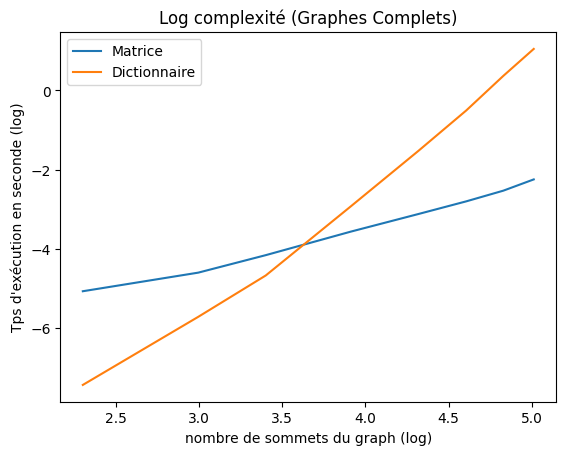

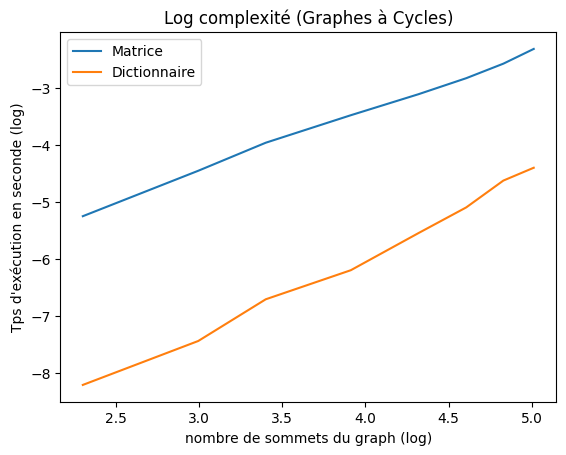

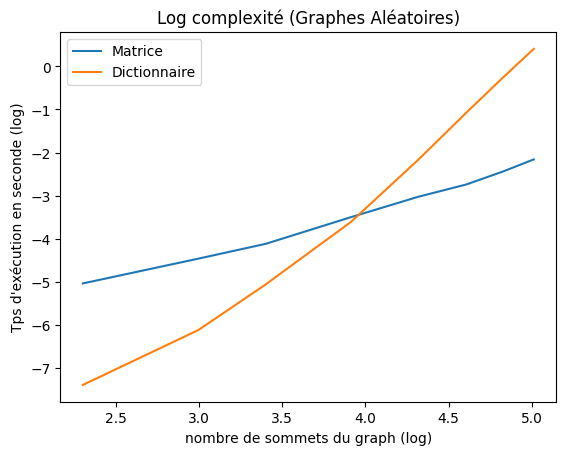

In [44]:
# Comparaison
plt.figure()
plt.title('Log complexité (Graphes Complets)')
plt.xlabel('nombre de sommets du graph (log)')
plt.ylabel('Tps d\'exécution en seconde (log)')
plt.plot(np.log(N), np.log(tps_complet_karger[:-2]), label='Matrice')
plt.plot(np.log(N), np.log(tps_complet_karger2), label='Dictionnaire')
plt.legend()
plt.show()

plt.figure()
plt.title('Log complexité (Graphes à Cycles)')
plt.xlabel('nombre de sommets du graph (log)')
plt.ylabel('Tps d\'exécution en seconde (log)')
plt.plot(np.log(N), np.log(tps_cycle_karger[:-2]), label='Matrice')
plt.plot(np.log(N), np.log(tps_cycle_karger2), label='Dictionnaire')
plt.legend()
plt.show()

plt.figure()
plt.title('Log complexité (Graphes Aléatoires)')
plt.xlabel('nombre de sommets du graph (log)')
plt.ylabel('Tps d\'exécution en seconde (log)')
plt.plot(np.log(N), np.log(tps_alea_karger[:-2]), label='Matrice')
plt.plot(np.log(N), np.log(tps_alea_karger2), label='Dictionnaire')
plt.legend()
plt.show()

### Analyse

Sur les petits graphes (environ jusqu'à 50) les dictionnaires sont plus efficaces. Mais la matrice d'adjacence est plus efficace sur des gros graphs.

Les dictionnaires sont cependant plus rapides pour les graphes à cycles.

# Partie 2 : Amplification du Succès de l’Algorithme

Dans cette deuxième partie, nous allons principalement étudier le taux de succès de notre algorithme sur différentes familles connues de graphe. Nous allons chercher à maximiser son taux de succès pour avoir un algorithme le plus fiable possible.

## 2.a : Étude Expérimentale (Karger)

Nous allons comparer les résultats renvoyés par notre algorithme pour les graphes dont nous connaissons par définition la valeur de la coupe minimale. Nous conaissons en effet certains des résultats attendus :

- coupe minimale d'un graphe complet de taille $N$ : $N-1$
- coupe minimale d'un graphe $N$-cycles : $2$
- coupe minimale d'un graphe bi-parti de taille $2k$ : $k$

Nous effectuerons nos tests avec la structure de données programmée dans la seconde moitié de la première partie (dictionnaire).

Pour simplifier, nos tests nous développons un méthode qui nous renvoie le nombre de succès suivant le type de graphe, le nombre de tests, et le résultat attendu.

In [54]:
def testProba(graphe, nbTest, tailleCoupe):
    taille = tailleCoupe
    nbSucces = 0
    for i in range(nbTest):
        g1 = graphe.copy()
        g = karger2(g1) # Les deux coupe du format {'som1, som2, ...': [suc1, suc2], 'som1, som2, ...': [suc1, suc2]}
        s = list(g.keys())[0] #une des deux coupe
        t = len(g[s]) #la taille de la coupe
        if t == taille:
            nbSucces += 1
    return nbSucces

In [58]:
## Attention, cellule lente à l'éxecution ##
N = [10,20,30,40,50,60,70,80,90,100]
nbTest = 500

proba_complet = []
for n in N:
    nbSucces = testProba(grapheComplet(n), nbTest, n-1)
    proba_complet.append(nbSucces/nbTest)

proba_cycle = []
for n in N:
    nbSucces = testProba(grapheCycle(n), nbTest, 2)
    proba_cycle.append(nbSucces/nbTest)

proba_biparti = []
for n in N:
    nbSucces = testProba(grapheBipartieComplet(n), nbTest, n/2)
    proba_biparti.append(nbSucces/nbTest)

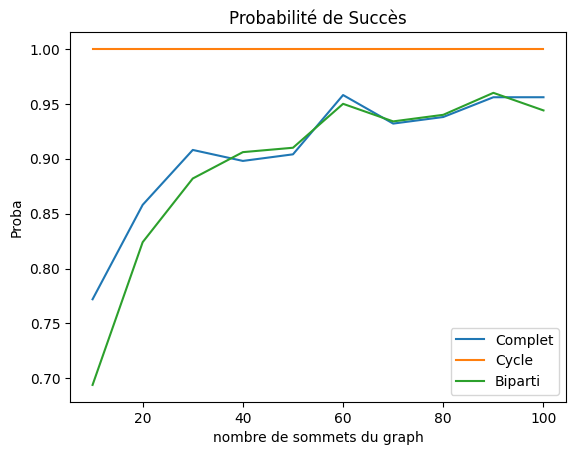

In [59]:
plt.figure()
plt.title('Probabilité de Succès')
plt.xlabel('nombre de sommets du graph')
plt.ylabel('Proba')
plt.plot(N,proba_complet, label = "Complet")
plt.plot(N,proba_cycle, label = "Cycle")
plt.plot(N,proba_biparti, label = "Biparti")
plt.legend()
plt.show()

### Analyse

Nos résultats sont toujours corrects sur les graphes $N$-cycles.

Pour les autres familles, nous pouvons remarquer que le pourcentage de bonne réponse augmente avec la taille des graphes testés.

## 2.b : Algorithme de Karger Itéré

Nous implémentons l'algorithme de Karger Itéré pour fonctionner avec notre structure de données en dictionnaire.

In [ ]:
def kargerIter(g, t):
    m = -1
    gFinal = dict()
    while t > 0:
        g1 = g.copy()
        while len(g1.keys()) > 2:
            arete =randomSommet(g1)
            g1 = contraction(g1, arete)
        sIter = list(g1.keys())[0]
        if(m == -1 or len(sIter) < m):
            m = len(sIter)
            gFinal = g1.copy()
        
        t -= 1
    return gFinal

## 2.c : Étude Expérimentale (Karger Itéré)

In [ ]:
def testProba2(graphe, nbTest, tailleCoupe):
    taille = tailleCoupe
    nbSucces = 0
    for i in range(nbTest):
        g1 = graphe.copy()
        g = kargerIter(g1) # Les deux coupe du format {'som1, som2, ...': [suc1, suc2], 'som1, som2, ...': [suc1, suc2]}
        s = list(g.keys())[0] #une des deux coupe
        t = len(g[s]) #la taille de la coupe
        if t == taille:
            nbSucces += 1
    return nbSucces

In [ ]:
N = [10,20,30,40,50,60,70,80,90,100]
nbTest = 500

proba_complet2 = []
for n in N:
    nbSucces = testProba2(grapheComplet(n), nbTest, n-1)
    proba_complet2.append(nbSucces/nbTest)

proba_cycle2 = []
for n in N:
    nbSucces = testProba2(grapheCycle(n), nbTest, 2)
    proba_cycle2.append(nbSucces/nbTest)

proba_biparti2 = []
for n in N:
    nbSucces = testProba2(grapheBipartieComplet(n), nbTest, n/2)
    proba_biparti2.append(nbSucces/nbTest)

In [ ]:
plt.figure()
plt.title('Probabilité de Succès')
plt.xlabel('nombre de sommets du graph')
plt.ylabel('Proba')
plt.plot(N,proba_complet2, label = "Complet")
plt.plot(N,proba_cycle2, label = "Cycle")
plt.plot(N,proba_biparti2, label = "Biparti")
plt.legend()
plt.show()

# Partie 3 : Algorithme de Karger-Stein

## 3.d : Implémentation

In [ ]:
def contractionPartielle(g ,t):
    g1 = g.copy()
    while(len(g1.keys()) > t):
        arete = randomSommet(g1)
        contraction(g1, arete)
        
    return g1

In [ ]:

def calculCoup(g):
    m = -1 #la taille de la coupe minimale trouver jusqu'a maintenant 
    listKeys = list(g.keys()) #Les sommets du graphe g 
    n = len(listKeys) #Le nombre de sommet du graphe g
    nb = pow(2, n) - 2 #Le nombre de combinaison a essaie
    i = 1
    sBest = dict() #La coupe minimale
    while i < nb:
        s = i
        sommet = []
        j = 0
        ##calculer les sommets attester comme coupe
        while s > 0: 
            if s%2 == 1:
                sommet.append(j)
            s  = int(s/2)
            j += 1
        if (len(sommet) == 1): #Couper que le sommet
            som = sommet[0] #récupèrer le numéro du sommet
            som =  listKeys[som] #récupèrer la clé du sommet 
            if m == -1 or m > len(g[som]) :
                m = len(g[som])
                sBest = som
        else: #compter le nombre d'arête sortante 
            #recupèrer la coupe actuel
            sActuel = []
            for s in sommet:
                som = listKeys[s]
                for elm in som.split(','):
                    sActuel.append(elm)
            #compter le nombre d'arête de la coupe actuelle 
            coupe1 = 0
            for s in sommet:
                som = listKeys[s]
                arete = g[som] #Les successeurs du sommet 
                for elm in arete:
                    if elm not in sActuel:
                        coupe1 += 1
            if m == -1 or m > coupe1:
                m = coupe1 
                sBest = ','.join(sActuel) #La coupe minimale
        
        i += 1
    return sBest.split(",")


In [ ]:
def kargerStein(g):
    m = -1 
    if len(list(g.keys())) <= 6:
        return calculCoup(g)
    else:
        t = int( 1 + len( list(g.keys())) / sqrt(2))
        g1 = contractionPartielle(g, t)
        s1 = kargerStein(g1)
        m1 = len(s1)
        g2 = contractionPartielle(g, t)
        s2 = kargerStein(g2)
        m2 = len(s2)
        if m1 < m2:
            return s1
        else:
            return s2